In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as colors
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [214]:
df = pd.read_csv('iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv')

/tmp/ipykernel_17409/160800246.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv')


In [215]:
len(df.columns)

286

In [216]:
df

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,3229273,3313528,6492674,3202134,3290540,14736111,7398617,7337494,33885546,15142976,8139094,7003882,95.25,31755284,83663440,10321914,10047365,4969883,5077482,10764379,5311288,5453091,10943540,5389280,5554260,10806690,5344540,5462150,10422095,5256211,5165884,9993001,5131597,4861404,9420827,4893101,4527726,9020276,4688746,4331530,8503586,4441282,4062304,7942413,4130069,3812344,7037532,3705369,3332163,5695958,3002982,2692976,4821062,2563200,2257862,3645077,1938227,1706850,2647340,1413848,1233492,1814582,966684,847898,1175364,651552,523812,1039551,605583,433968,2.09,102724322,52519974,50204348,21611963,11222300,10389663,111075594,57288776,53786818,3807844,1889986,1917858,7364645,3783447,3581198,865972,547528,318444,6423548,3198595,3224953,7177185,785361,6317027,11800247,2576213,1297617,1278596,6179890,2939986,2691338,945162,1350802,1168098,1149257,13934448,4365234,8974853,864662,2900108,673540,26

In [217]:
df['NOM_ENT'].unique()

array(['Total nacional', 'Aguascalientes', 'Baja California',
       'Baja California Sur', 'Campeche', 'Coahuila de Zaragoza',
       'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de México', 'Durango',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'México',
       'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [218]:
df[df['NOM_ENT'] == 'Ciudad de México']

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444

In [219]:
df.columns

Index(['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT',
       ...
       'VPH_CEL', 'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ',
       'VPH_SINRTV', 'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC', 'TAMLOC'],
      dtype='object', length=286)

In [220]:
df['ENTIDAD'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [221]:
df_cdmx = df[df['NOM_ENT'] == 'Ciudad de México'].copy()

In [222]:
df_cdmx

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444

In [223]:
pd.set_option('display.max_rows', None)
df_cdmx.isna().sum()

ENTIDAD         0
NOM_ENT         0
MUN             0
NOM_MUN         0
LOC             0
NOM_LOC         0
LONGITUD       32
LATITUD        32
ALTITUD        32
POBTOT          0
POBFEM          0
POBMAS          0
P_0A2           0
P_0A2_F         0
P_0A2_M         0
P_3YMAS         0
P_3YMAS_F       0
P_3YMAS_M       0
P_5YMAS         0
P_5YMAS_F       0
P_5YMAS_M       0
P_12YMAS        0
P_12YMAS_F      0
P_12YMAS_M      0
P_15YMAS        0
P_15YMAS_F      0
P_15YMAS_M      0
P_18YMAS        0
P_18YMAS_F      0
P_18YMAS_M      0
P_3A5           0
P_3A5_F         0
P_3A5_M         0
P_6A11          0
P_6A11_F        0
P_6A11_M        0
P_8A14          0
P_8A14_F        0
P_8A14_M        0
P_12A14         0
P_12A14_F       0
P_12A14_M       0
P_15A17         0
P_15A17_F       0
P_15A17_M       0
P_18A24         0
P_18A24_F       0
P_18A24_M       0
P_15A49_F       0
P_60YMAS        0
P_60YMAS_F      0
P_60YMAS_M      0
REL_H_M         0
POB0_14         0
POB15_64        0
POB65_MAS 

In [224]:
pd.reset_option('display.max_rows')

In [225]:
df_cdmx.head(30)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444

In [226]:
df_cdmx_fil = df_cdmx[df_cdmx['LOC'] == 0].copy()

In [227]:
df_cdmx_fil

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444

In [228]:
df_cdmx_fil = df_cdmx_fil.dropna(axis = 1)

In [229]:
df_cdmx_fil

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,P_0A4,P_0A4_F,P_0A4_M,P_5A9,P_5A9_F,P_5A9_M,P_10A14,P_10A14_F,P_10A14_M,P_15A19,P_15A19_F,P_15A19_M,P_20A24,P_20A24_F,P_20A24_M,P_25A29,P_25A29_F,P_25A29_M,P_30A34,P_30A34_F,P_30A34_M,P_35A39,P_35A39_F,P_35A39_M,P_40A44,P_40A44_F,P_40A44_M,P_45A49,P_45A49_F,P_45A49_M,P_50A54,P_50A54_F,P_50A54_M,P_55A59,P_55A59_F,P_55A59_M,P_60A64,P_60A64_F,P_60A64_M,P_65A69,P_65A69_F,P_65A69_M,P_70A74,P_70A74_F,P_70A74_M,P_75A79,P_75A79_F,P_75A79_M,P_80A84,P_80A84_F,P_80A84_M,P_85YMAS,P_85YMAS_F,P_85YMAS_M,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
52272,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,479904,237027,242877,563907,277627,286280,608962,299822,309140,650389,319280,331109,714605,355556,359049,752289,380208,372081,743611,380163,363448,705850,365305,340545,670307,352995,317312,668945,355099,313846,623483,337089,286394,526447,286796,239651,469514,260449,209065,356196,198951,157245,267744,152614,115130,175215,101005,74210,117480,71386,46094,105470,68802,36668,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444,73765,33679,162484,96369,66115,27782

In [230]:
df_cdmx_fil['PRO_OCUP_C']

52272     0.8
52275    0.77
52277     0.7
52279    0.81
52306    0.83
52308    0.82
52310    0.92
52312    0.87
52338    1.03
52585    0.81
52594    0.93
52649    0.81
52816    0.91
52930    0.56
52932    0.72
52934    0.66
52936    0.82
Name: PRO_OCUP_C, dtype: object

#### La marginalidad se refiere a la situación social de individuos o grupos que viven al margen de la sociedad dominante. Se caracteriza por la falta de participación en los beneficios, recursos y redes de decisión sociales

Por esto nos enfocamos en elegir las caracteristicas que contemplen falta de recursoso como agua, drenaje, seguro social, educacion, vivienda. 

In [235]:
lst_var = [
    'NOM_MUN',
    'POBTOT','P5_HLI_NHE','P5_HLI_HE','P12A14NOAF','P12A14NOAM','P15YM_AN','P15YM_AN_F',
                  'P15YM_AN_M','P15YM_SE','P15YM_SE_F','P15YM_SE_M','P15PRI_IN','P15PRI_INF',
                  'P15PRI_INM' ,'P15SEC_IN','P15SEC_INF','P15SEC_INM', 'PSINDER','POB_AFRO',
    
    'VIVTOT',
    'VPH_PISOTI','VPH_S_ELEC','VPH_AGUAFV','VPH_NODREN','VPH_NDEAED','VPH_LETR',
                 'VPH_1DOR','VPH_1CUART', 'VPH_SINLTC','VPH_SINCINT','VPH_SNBIEN','VPH_SINRTV','VPH_SINTIC'
    
]


In [236]:
lst_pob = [
    'P5_HLI_NHE','P5_HLI_HE','P12A14NOAF','P12A14NOAM','P15YM_AN','P15YM_AN_F',
                  'P15YM_AN_M','P15YM_SE','P15YM_SE_F','P15YM_SE_M','P15PRI_IN','P15PRI_INF',
                  'P15PRI_INM' ,'P15SEC_IN','P15SEC_INF','P15SEC_INM', 'PSINDER','POB_AFRO'
]

In [237]:
lst_viv = [
    'VPH_PISOTI','VPH_S_ELEC','VPH_AGUAFV','VPH_NODREN','VPH_NDEAED','VPH_LETR',
                 'VPH_1DOR','VPH_1CUART', 'VPH_SINLTC','VPH_SINCINT','VPH_SNBIEN','VPH_SINRTV','VPH_SINTIC' # VPH_NDACMM
]

In [238]:
df_ind = df_cdmx_fil[lst_var].copy()

In [239]:
pd.set_option('display.max_columns', None)

In [240]:
df_ind # Dataframe con las variables que seleccionamos para el inidice de marginalidad

,NOM_MUN,POBTOT,P5_HLI_NHE,P5_HLI_HE,P12A14NOAF,P12A14NOAM,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15SEC_IN,P15SEC_INF,P15SEC_INM,PSINDER,POB_AFRO,VIVTOT,VPH_PISOTI,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN,VPH_NDEAED,VPH_LETR,VPH_1DOR,VPH_1CUART,VPH_SINLTC,VPH_SINCINT,VPH_SNBIEN,VPH_SINRTV,VPH_SINTIC
52272,Total de la entidad Ciudad de México,9209944,1016,122379,10935,12970,107444,73765,33679,162484,96369,66115,277823,171549,106274,195837,87488,108349,2502789,186914,3036239,16199,1917,29004,4207,175,4975,813453,136682,77272,561128,6180,46172,10528
52275,Azcapotzalco,432205,21,3150,430,539,3675,2658,1017,4863,3374,1489,10863,7082,3781,7539,3341,4198,90370,8864,149381,334,38,239,87,2,45,37763,3888,2869,22687,188,1661,322
52277,Coyoacán,614447,56,7584,588,655,5765,3902,1863,8086,5269,2817,14199,9085,5114,9614,4368,5246,160961,11120,208024,450,61,133,182,2,51,46621,8052,3506,27008,268,2893,443
52279,Cuajimalpa de Morelos,217686,6,1983,302,367,2575,1715,860,3852,2469,1383,7000,4343,2657,4773,2171,2602,52803,3053,65831,591,31,285,137,0,201,17170,3004,1675,11961,96,914,180
52306,Gustavo A. Madero,1173351,109,13839,1251,1590,14594,10191,4403,25271,12702,12569,37534,23289,14245,24464,10655,13809,300902,21697,370297,1466,160,755,298,11,139,104435,15782,11780,79559,847,5779,1523
52308,Iztacalco,404695,37,4316,358,458,3880,2738,1142,5380,3635,1745,11147,7133,4014,8181,3668,4513,110116,6941,130175,282,52,93,42,3,22,31878,4820,2666,21763,196,1568,322
52310,Iztapalapa,1835486,298,27932,2656,3175,26774,18428,8346,46418,24437,21981,69624,41866,27758,46664,20681,25983,594796,33313,537596,2872,300,1278,327,19,374,153423,33976,18791,132846,1500,9371,2489
52312,La Magdalena Contreras,247622,30,2824,298,353,3733,2507,1226,5200,3322,1878,8844,5379,3465,6702,2891,3811,68100,5459,71545,618,76,802,231,3,129,20505,4181,2064,14893,190,1029,308
52338,Milpa Alta,152685,31,4828,222,266,3219,2058,1161,3651,2204,1447,5921,3350,2571,3880,1641,2239,46029,2231,44823,1027,151,4107,605,33,817,14070,3884,2683,17031,274,1061,395
52585,Álvaro Obregón,759137,74,8288,1011,1165,9756,6739,3017,14621,9533,5088,25305,15486,9819,16986,7356,9630,187340,16042,236129,1153,74,417,220,3,95,65965,10835,5739,41663,435,3120,755


In [241]:
df_ind.dtypes

NOM_MUN        object
POBTOT          int64
P5_HLI_NHE     object
P5_HLI_HE      object
P12A14NOAF     object
P12A14NOAM     object
P15YM_AN       object
P15YM_AN_F     object
P15YM_AN_M     object
P15YM_SE       object
P15YM_SE_F     object
P15YM_SE_M     object
P15PRI_IN      object
P15PRI_INF     object
P15PRI_INM     object
P15SEC_IN      object
P15SEC_INF     object
P15SEC_INM     object
PSINDER        object
POB_AFRO       object
VIVTOT          int64
VPH_PISOTI     object
VPH_S_ELEC     object
VPH_AGUAFV     object
VPH_NODREN     object
VPH_NDEAED     object
VPH_LETR       object
VPH_1DOR       object
VPH_1CUART     object
VPH_SINLTC     object
VPH_SINCINT    object
VPH_SNBIEN     object
VPH_SINRTV     object
VPH_SINTIC     object
dtype: object

In [242]:
for v in lst_viv:
    df_ind[v] = pd.to_numeric(df_ind[v])
    df_ind['Tasa_'+v] = df_ind[v]/df_ind['VIVTOT']

In [243]:
for v in lst_pob:
    df_ind[v] = pd.to_numeric(df_ind[v])
    df_ind['Tasa_'+v] = df_ind[v]/df['POBTOT']

In [244]:
df_ind

,NOM_MUN,POBTOT,P5_HLI_NHE,P5_HLI_HE,P12A14NOAF,P12A14NOAM,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15SEC_IN,P15SEC_INF,P15SEC_INM,PSINDER,POB_AFRO,VIVTOT,VPH_PISOTI,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN,VPH_NDEAED,VPH_LETR,VPH_1DOR,VPH_1CUART,VPH_SINLTC,VPH_SINCINT,VPH_SNBIEN,VPH_SINRTV,VPH_SINTIC,Tasa_VPH_PISOTI,Tasa_VPH_S_ELEC,Tasa_VPH_AGUAFV,Tasa_VPH_NODREN,Tasa_VPH_NDEAED,Tasa_VPH_LETR,Tasa_VPH_1DOR,Tasa_VPH_1CUART,Tasa_VPH_SINLTC,Tasa_VPH_SINCINT,Tasa_VPH_SNBIEN,Tasa_VPH_SINRTV,Tasa_VPH_SINTIC,Tasa_P5_HLI_NHE,Tasa_P5_HLI_HE,Tasa_P12A14NOAF,Tasa_P12A14NOAM,Tasa_P15YM_AN,Tasa_P15YM_AN_F,Tasa_P15YM_AN_M,Tasa_P15YM_SE,Tasa_P15YM_SE_F,Tasa_P15YM_SE_M,Tasa_P15PRI_IN,Tasa_P15PRI_INF,Tasa_P15PRI_INM,Tasa_P15SEC_IN,Tasa_P15SEC_INF,Tasa_P15SEC_INM,Tasa_PSINDER,Tasa_POB_AFRO
52272,Total de la entidad Ciudad de México,9209944,1016,122379,10935,12970,107444,73765,33679,162484,96369,66115,277823,171549,106274,195837,87488,108349,2502789,186914,3036239,16199,1917,29004,4207,175,4975,813453,136682,77272,561128,6180,46172,10528,0.005335,0.000631,0.009553,0.001386,0.000058,0.001639,0.267915,0.045017,0.025450,0.184810,0.002035,0.015207,0.003467,0.000110,0.013288,0.001187,0.001408,0.011666,0.008009,0.003657,0.017642,0.010464,0.007179,0.030166,0.018626,0.011539,0.021264,0.009499,0.011764,0.271749,0.020295
52275,Azcapotzalco,432205,21,3150,430,539,3675,2658,1017,4863,3374,1489,10863,7082,3781,7539,3341,4198,90370,8864,149381,334,38,239,87,2,45,37763,3888,2869,22687,188,1661,322,0.002236,0.000254,0.001600,0.000582,0.000013,0.000301,0.252797,0.026027,0.019206,0.151873,0.001259,0.011119,0.002156,0.000049,0.007288,0.000995,0.001247,0.008503,0.006150,0.002353,0.011252,0.007806,0.003445,0.025134,0.016386,0.008748,0.017443,0.007730,0.009713,0.209091,0.020509
52277,Coyoacán,614447,56,7584,588,655,5765,3902,1863,8086,5269,2817,14199,9085,5114,9614,4368,5246,160961,11120,208024,450,61,133,182,2,51,46621,8052,3506,27008,268,2893,443,0.002163,0.000293,0.000639,0.000875,0.000010,0.000245,0.224114,0.038707,0.016854,0.129831,0.001288,0.013907,0.002130,0.000091,0.012343,0.000957,0.001066,0.009382,0.006350,0.003032,0.013160,0.008575,0.004585,0.023109,0.014786,0.008323,0.015647,0.007109,0.008538,0.261961,0.018098
52279,Cuajimalpa de Morelos,217686,6,1983,302,367,2575,1715,860,3852,2469,1383,7000,4343,2657,4773,2171,2602,52803,3053,65831,591,31,285,137,0,201,17170,3004,1675,11961,96,914,180,0.008978,0.000471,0.004329,0.002081,0.000000,0.003053,0.260819,0.045632,0.025444,0.181693,0.001458,0.013884,0.002734,0.000028,0.009109,0.001387,0.001686,0.011829,0.007878,0.003951,0.017695,0.011342,0.006353,0.032156,0.019951,0.012206,0.021926,0.009973,0.011953,0.242565,0.014025
52306,Gustavo A. Madero,1173351,109,13839,1251,1590,14594,10191,4403,25271,12702,12569,37534,23289,14245,24464,10655,13809,300902,21697,370297,1466,160,755,298,11,139,104435,15782,11780,79559,847,5779,1523,0.003959,0.000432,0.002039,0.000805,0.000030,0.000375,0.282030,0.042620,0.031812,0.214852,0.002287,0.015606,0.004113,0.000093,0.011794,0.001066,0.001355,0.012438,0.008685,0.003753,0.021537,0.010825,0.010712,0.031989,0.019848,0.012140,0.020850,0.009081,0.011769,0.256447,0.018491
52308,Iztacalco,404695,37,4316,358,458,3880,2738,1142,5380,3635,1745,11147,7133,4014,8181,3668,4513,110116,6941,130175,282,52,93,42,3,22,31878,4820,2666,21763,196,1568,322,0.002166,0.000399,0.000714,0.000323,0.000023,0.000169,0.244886,0.037027,0.020480,0.167183,0.001506,0.012045,0.002474,0.000091,0.010665,0.000885,0.001132,0.009587,0.006766,0.002822,0.013294,0.008982,0.004312,0.027544,0.017626,0.009919,0.020215,0.009064,0.011152,0.272096,0.017151
52310,Iztapalapa,1835486,298,27932,2656,3175,26774,18428,8346,46418,24437,21981,69624,41866,27758,46664,20681,25983,594796,33313,537596,2872,300,1278,327,19,374,153423,33976,18791,132846,1500,9371,2489,0.005342,0.000558,0.002377,0.000608,0.000035,0.000696,0.285387,0.063200,0.034954,0.247111,0.002790,0.017431,0.004630,0.000162,0.015218,

In [245]:
df_ind.columns

Index(['NOM_MUN', 'POBTOT', 'P5_HLI_NHE', 'P5_HLI_HE', 'P12A14NOAF',
       'P12A14NOAM', 'P15YM_AN', 'P15YM_AN_F', 'P15YM_AN_M', 'P15YM_SE',
       'P15YM_SE_F', 'P15YM_SE_M', 'P15PRI_IN', 'P15PRI_INF', 'P15PRI_INM',
       'P15SEC_IN', 'P15SEC_INF', 'P15SEC_INM', 'PSINDER', 'POB_AFRO',
       'VIVTOT', 'VPH_PISOTI', 'VPH_S_ELEC', 'VPH_AGUAFV', 'VPH_NODREN',
       'VPH_NDEAED', 'VPH_LETR', 'VPH_1DOR', 'VPH_1CUART', 'VPH_SINLTC',
       'VPH_SINCINT', 'VPH_SNBIEN', 'VPH_SINRTV', 'VPH_SINTIC',
       'Tasa_VPH_PISOTI', 'Tasa_VPH_S_ELEC', 'Tasa_VPH_AGUAFV',
       'Tasa_VPH_NODREN', 'Tasa_VPH_NDEAED', 'Tasa_VPH_LETR', 'Tasa_VPH_1DOR',
       'Tasa_VPH_1CUART', 'Tasa_VPH_SINLTC', 'Tasa_VPH_SINCINT',
       'Tasa_VPH_SNBIEN', 'Tasa_VPH_SINRTV', 'Tasa_VPH_SINTIC',
       'Tasa_P5_HLI_NHE', 'Tasa_P5_HLI_HE', 'Tasa_P12A14NOAF',
       'Tasa_P12A14NOAM', 'Tasa_P15YM_AN', 'Tasa_P15YM_AN_F',
       'Tasa_P15YM_AN_M', 'Tasa_P15YM_SE', 'Tasa_P15YM_SE_F',
       'Tasa_P15YM_SE_M', 'Tasa_P15PRI_IN'

In [246]:
lst_pca = [ 'Tasa_VPH_PISOTI',
       'Tasa_VPH_S_ELEC', 'Tasa_VPH_AGUAFV', 'Tasa_VPH_NODREN',
       'Tasa_VPH_NDEAED', 'Tasa_VPH_LETR', 'Tasa_VPH_1DOR', 'Tasa_VPH_1CUART',
       'Tasa_VPH_SINLTC', 'Tasa_VPH_SINCINT', 'Tasa_VPH_SNBIEN',
       'Tasa_VPH_SINRTV', 'Tasa_VPH_SINTIC', 'Tasa_P5_HLI_NHE',
       'Tasa_P5_HLI_HE', 'Tasa_P12A14NOAF', 'Tasa_P12A14NOAM', 'Tasa_P15YM_AN',
       'Tasa_P15YM_AN_F', 'Tasa_P15YM_AN_M', 'Tasa_P15YM_SE',
       'Tasa_P15YM_SE_F', 'Tasa_P15YM_SE_M', 'Tasa_P15PRI_IN',
       'Tasa_P15PRI_INF', 'Tasa_P15PRI_INM', 'Tasa_P15SEC_IN',
       'Tasa_P15SEC_INF', 'Tasa_P15SEC_INM', 'Tasa_PSINDER','Tasa_POB_AFRO']

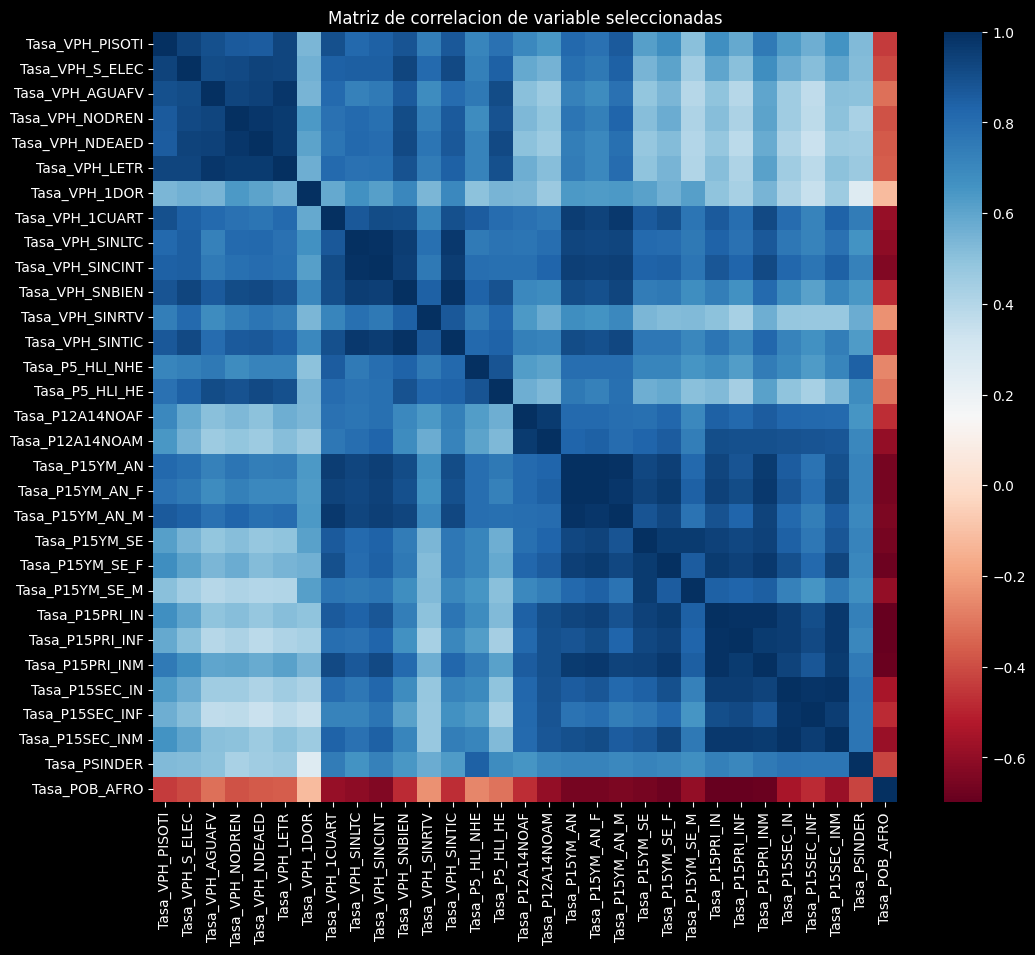

In [247]:
matriz_corr = df_ind[lst_pca].corr()
plt.figure(figsize=(12,10))
plt.title('Matriz de correlacion de variable seleccionadas')
sns.heatmap(matriz_corr, cmap='RdBu')
plt.show()

In [248]:
lst_pca = [ 'NOM_MUN','Tasa_VPH_PISOTI',
       'Tasa_VPH_S_ELEC', 'Tasa_VPH_AGUAFV', 'Tasa_VPH_NODREN',
       'Tasa_VPH_NDEAED', 'Tasa_VPH_LETR', 'Tasa_VPH_1DOR', 'Tasa_VPH_1CUART',
       'Tasa_VPH_SINLTC', 'Tasa_VPH_SINCINT', 'Tasa_VPH_SNBIEN',
       'Tasa_VPH_SINRTV', 'Tasa_VPH_SINTIC', 'Tasa_P5_HLI_NHE',
       'Tasa_P5_HLI_HE', 'Tasa_P12A14NOAF', 'Tasa_P12A14NOAM', 'Tasa_P15YM_AN',
       'Tasa_P15YM_AN_F', 'Tasa_P15YM_AN_M', 'Tasa_P15YM_SE',
       'Tasa_P15YM_SE_F', 'Tasa_P15YM_SE_M', 'Tasa_P15PRI_IN',
       'Tasa_P15PRI_INF', 'Tasa_P15PRI_INM', 'Tasa_P15SEC_IN',
       'Tasa_P15SEC_INF', 'Tasa_P15SEC_INM', 'Tasa_PSINDER','Tasa_POB_AFRO']


In [249]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components = 2)
)

In [250]:
df_ind[lst_pca]

,NOM_MUN,Tasa_VPH_PISOTI,Tasa_VPH_S_ELEC,Tasa_VPH_AGUAFV,Tasa_VPH_NODREN,Tasa_VPH_NDEAED,Tasa_VPH_LETR,Tasa_VPH_1DOR,Tasa_VPH_1CUART,Tasa_VPH_SINLTC,Tasa_VPH_SINCINT,Tasa_VPH_SNBIEN,Tasa_VPH_SINRTV,Tasa_VPH_SINTIC,Tasa_P5_HLI_NHE,Tasa_P5_HLI_HE,Tasa_P12A14NOAF,Tasa_P12A14NOAM,Tasa_P15YM_AN,Tasa_P15YM_AN_F,Tasa_P15YM_AN_M,Tasa_P15YM_SE,Tasa_P15YM_SE_F,Tasa_P15YM_SE_M,Tasa_P15PRI_IN,Tasa_P15PRI_INF,Tasa_P15PRI_INM,Tasa_P15SEC_IN,Tasa_P15SEC_INF,Tasa_P15SEC_INM,Tasa_PSINDER,Tasa_POB_AFRO
52272,Total de la entidad Ciudad de México,0.005335,0.000631,0.009553,0.001386,0.000058,0.001639,0.267915,0.045017,0.025450,0.184810,0.002035,0.015207,0.003467,0.000110,0.013288,0.001187,0.001408,0.011666,0.008009,0.003657,0.017642,0.010464,0.007179,0.030166,0.018626,0.011539,0.021264,0.009499,0.011764,0.271749,0.020295
52275,Azcapotzalco,0.002236,0.000254,0.001600,0.000582,0.000013,0.000301,0.252797,0.026027,0.019206,0.151873,0.001259,0.011119,0.002156,0.000049,0.007288,0.000995,0.001247,0.008503,0.006150,0.002353,0.011252,0.007806,0.003445,0.025134,0.016386,0.008748,0.017443,0.007730,0.009713,0.209091,0.020509
52277,Coyoacán,0.002163,0.000293,0.000639,0.000875,0.000010,0.000245,0.224114,0.038707,0.016854,0.129831,0.001288,0.013907,0.002130,0.000091,0.012343,0.000957,0.001066,0.009382,0.006350,0.003032,0.013160,0.008575,0.004585,0.023109,0.014786,0.008323,0.015647,0.007109,0.008538,0.261961,0.018098
52279,Cuajimalpa de Morelos,0.008978,0.000471,0.004329,0.002081,0.000000,0.003053,0.260819,0.045632,0.025444,0.181693,0.001458,0.013884,0.002734,0.000028,0.009109,0.001387,0.001686,0.011829,0.007878,0.003951,0.017695,0.011342,0.006353,0.032156,0.019951,0.012206,0.021926,0.009973,0.011953,0.242565,0.014025
52306,Gustavo A. Madero,0.003959,0.000432,0.002039,0.000805,0.000030,0.000375,0.282030,0.042620,0.031812,0.214852,0.002287,0.015606,0.004113,0.000093,0.011794,0.001066,0.001355,0.012438,0.008685,0.003753,0.021537,0.010825,0.010712,0.031989,0.019848,0.012140,0.020850,0.009081,0.011769,0.256447,0.018491
52308,Iztacalco,0.002166,0.000399,0.000714,0.000323,0.000023,0.000169,0.244886,0.037027,0.020480,0.167183,0.001506,0.012045,0.002474,0.000091,0.010665,0.000885,0.001132,0.009587,0.006766,0.002822,0.013294,0.008982,0.004312,0.027544,0.017626,0.009919,0.020215,0.009064,0.011152,0.272096,0.017151
52310,Iztapalapa,0.005342,0.000558,0.002377,0.000608,0.000035,0.000696,0.285387,0.063200,0.034954,0.247111,0.002790,0.017431,0.004630,0.000162,0.015218,0.001447,0.001730,0.014587,0.010040,0.004547,0.025289,0.013314,0.011976,0.037932,0.022809,0.015123,0.025423,0.011267,0.014156,0.324054,0.018149
52312,La Magdalena Contreras,0.008638,0.001062,0.011210,0.003229,0.000042,0.001803,0.286603,0.058439,0.028849,0.208163,0.002656,0.014383,0.004305,0.000121,0.011404,0.001203,0.001426,0.015075,0.010124,0.004951,0.021000,0.013416,0.007584,0.035716,0.021723,0.013993,0.027065,0.011675,0.015390,0.275016,0.022046
52338,Milpa Alta,0.022912,0.003369,0.091627,0.013498,0.000736,0.018227,0.313901,0.086652,0.059858,0.379961,0.006113,0.023671,0.008812,0.000203,0.031621,0.001454,0.001742,0.021083,0.013479,0.007604,0.023912,0.014435,0.009477,0.038779,0.021941,0.016839,0.025412,0.010748,0.014664,0.301464,0.014612
52585,Álvaro Obregón,0.004883,0.000313,0.001766,0.000932,0.000013,0.000402,0.279360,0.045886,0.024305,0.176442,0.001842,0.013213,0.003197,0.000097,0.010918,0.001332,0.001535,0.012851,0.008877,0.003974,0.019260,0.012558,0.006702,0.033334,0.020399,0.012934,0.022375,0.009690,0.012685,0.246780,0.021132


In [251]:
df_pca = df_ind[lst_pca].copy().reset_index(drop = True)

In [252]:
df_pca.set_index(['NOM_MUN'], inplace = True)

In [253]:
df_pca = df_pca.drop(index ='Total de la entidad Ciudad de México')

In [254]:
df_pca

,Tasa_VPH_PISOTI,Tasa_VPH_S_ELEC,Tasa_VPH_AGUAFV,Tasa_VPH_NODREN,Tasa_VPH_NDEAED,Tasa_VPH_LETR,Tasa_VPH_1DOR,Tasa_VPH_1CUART,Tasa_VPH_SINLTC,Tasa_VPH_SINCINT,Tasa_VPH_SNBIEN,Tasa_VPH_SINRTV,Tasa_VPH_SINTIC,Tasa_P5_HLI_NHE,Tasa_P5_HLI_HE,Tasa_P12A14NOAF,Tasa_P12A14NOAM,Tasa_P15YM_AN,Tasa_P15YM_AN_F,Tasa_P15YM_AN_M,Tasa_P15YM_SE,Tasa_P15YM_SE_F,Tasa_P15YM_SE_M,Tasa_P15PRI_IN,Tasa_P15PRI_INF,Tasa_P15PRI_INM,Tasa_P15SEC_IN,Tasa_P15SEC_INF,Tasa_P15SEC_INM,Tasa_PSINDER,Tasa_POB_AFRO
NOM_MUN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Azcapotzalco,0.002236,0.000254,0.001600,0.000582,0.000013,0.000301,0.252797,0.026027,0.019206,0.151873,0.001259,0.011119,0.002156,0.000049,0.007288,0.000995,0.001247,0.008503,0.006150,0.002353,0.011252,0.007806,0.003445,0.025134,0.016386,0.008748,0.017443,0.007730,0.009713,0.209091,0.020509
Coyoacán,0.002163,0.000293,0.000639,0.000875,0.000010,0.000245,0.224114,0.038707,0.016854,0.129831,0.001288,0.013907,0.002130,0.000091,0.012343,0.000957,0.001066,0.009382,0.006350,0.003032,0.013160,0.008575,0.004585,0.023109,0.014786,0.008323,0.015647,0.007109,0.008538,0.261961,0.018098
Cuajimalpa de Morelos,0.008978,0.000471,0.004329,0.002081,0.000000,0.003053,0.260819,0.045632,0.025444,0.181693,0.001458,0.013884,0.002734,0.000028,0.009109,0.001387,0.001686,0.011829,0.007878,0.003951,0.017695,0.011342,0.006353,0.032156,0.019951,0.012206,0.021926,0.009973,0.011953,0.242565,0.014025
Gustavo A. Madero,0.003959,0.000432,0.002039,0.000805,0.000030,0.000375,0.282030,0.042620,0.031812,0.214852,0.002287,0.015606,0.004113,0.000093,0.011794,0.001066,0.001355,0.012438,0.008685,0.003753,0.021537,0.010825,0.010712,0.031989,0.019848,0.012140,0.020850,0.009081,0.011769,0.256447,0.018491
Iztacalco,0.002166,0.000399,0.000714,0.000323,0.000023,0.000169,0.244886,0.037027,0.020480,0.167183,0.001506,0.012045,0.002474,0.000091,0.010665,0.000885,0.001132,0.009587,0.006766,0.002822,0.013294,0.008982,0.004312,0.027544,0.017626,0.009919,0.020215,0.009064,0.011152,0.272096,0.017151
Iztapalapa,0.005342,0.000558,0.002377,0.000608,0.000035,0.000696,0.285387,0.063200,0.034954,0.247111,0.002790,0.017431,0.004630,0.000162,0.015218,0.001447,0.001730,0.014587,0.010040,0.004547,0.025289,0.013314,0.011976,0.037932,0.022809,0.015123,0.025423,0.011267,0.014156,0.324054,0.018149
La Magdalena Contreras,0.008638,0.001062,0.011210,0.003229,0.000042,0.001803,0.286603,0.058439,0.028849,0.208163,0.002656,0.014383,0.004305,0.000121,0.011404,0.001203,0.001426,0.015075,0.010124,0.004951,0.021000,0.013416,0.007584,0.035716,0.021723,0.013993,0.027065,0.011675,0.015390,0.275016,0.022046
Milpa Alta,0.022912,0.003369,0.091627,0.013498,0.000736,0.018227,0.313901,0.086652,0.059858,0.379961,0.006113,0.023671,0.008812,0.000203,0.031621,0.001454,0.001742,0.021083,0.013479,0.007604,0.023912,0.014435,0.009477,0.038779,0.021941,0.016839,0.025412,0.010748,0.014664,0.301464,0.014612
Álvaro Obregón,0.004883,0.000313,0.001766,0.000932,0.000013,0.000402,0.279360,0.045886,0.024305,0.176442,0.001842,0.013213,0.003197,0.000097,0.010918,0.001332,0.001535,0.012851,0.008877,0.003974,0.019260,0.012558,0.006702,0.033334,0.020399,0.012934,0.022375,0.009690,0.012685,0.246780,0.021132


In [255]:
pipe.fit(df_pca)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [256]:
pca_df = pipe.fit_transform(df_pca)

In [257]:
indice = pca_df[:,0]

In [258]:
df_two_axis = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])

In [259]:
df_pca['Indice_marginalidad'] = indice

In [260]:
df_pca.sort_values(by = 'Indice_marginalidad')

,Tasa_VPH_PISOTI,Tasa_VPH_S_ELEC,Tasa_VPH_AGUAFV,Tasa_VPH_NODREN,Tasa_VPH_NDEAED,Tasa_VPH_LETR,Tasa_VPH_1DOR,Tasa_VPH_1CUART,Tasa_VPH_SINLTC,Tasa_VPH_SINCINT,Tasa_VPH_SNBIEN,Tasa_VPH_SINRTV,Tasa_VPH_SINTIC,Tasa_P5_HLI_NHE,Tasa_P5_HLI_HE,Tasa_P12A14NOAF,Tasa_P12A14NOAM,Tasa_P15YM_AN,Tasa_P15YM_AN_F,Tasa_P15YM_AN_M,Tasa_P15YM_SE,Tasa_P15YM_SE_F,Tasa_P15YM_SE_M,Tasa_P15PRI_IN,Tasa_P15PRI_INF,Tasa_P15PRI_INM,Tasa_P15SEC_IN,Tasa_P15SEC_INF,Tasa_P15SEC_INM,Tasa_PSINDER,Tasa_POB_AFRO,Indice_marginalidad
NOM_MUN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Benito Juárez,0.000645,0.000145,0.000215,0.000165,0.000000,0.000025,0.271204,0.014966,0.005705,0.053192,0.000570,0.012170,0.000955,0.000021,0.008075,0.000785,0.000755,0.003110,0.002216,0.000894,0.004959,0.003411,0.001548,0.009658,0.006974,0.002683,0.007864,0.004091,0.003773,0.200844,0.028389,-9.151488
Miguel Hidalgo,0.001356,0.000268,0.000648,0.000767,0.000006,0.000059,0.267505,0.024335,0.014258,0.093864,0.001052,0.014620,0.002491,0.000058,0.008539,0.000960,0.000951,0.006268,0.004577,0.001691,0.008276,0.005844,0.002432,0.018194,0.012447,0.005747,0.014199,0.006937,0.007262,0.192315,0.027172,-5.886053
Azcapotzalco,0.002236,0.000254,0.001600,0.000582,0.000013,0.000301,0.252797,0.026027,0.019206,0.151873,0.001259,0.011119,0.002156,0.000049,0.007288,0.000995,0.001247,0.008503,0.006150,0.002353,0.011252,0.007806,0.003445,0.025134,0.016386,0.008748,0.017443,0.007730,0.009713,0.209091,0.020509,-3.987699
Coyoacán,0.002163,0.000293,0.000639,0.000875,0.000010,0.000245,0.224114,0.038707,0.016854,0.129831,0.001288,0.013907,0.002130,0.000091,0.012343,0.000957,0.001066,0.009382,0.006350,0.003032,0.013160,0.008575,0.004585,0.023109,0.014786,0.008323,0.015647,0.007109,0.008538,0.261961,0.018098,-3.576552
Cuauhtémoc,0.001123,0.000360,0.000803,0.000575,0.000009,0.000118,0.252047,0.027656,0.018091,0.137223,0.001505,0.018415,0.002773,0.000121,0.016258,0.001145,0.001361,0.008046,0.005824,0.002222,0.011132,0.007646,0.003486,0.022124,0.014721,0.007403,0.019125,0.009271,0.009854,0.281745,0.027075,-2.881722
Iztacalco,0.002166,0.000399,0.000714,0.000323,0.000023,0.000169,0.244886,0.037027,0.020480,0.167183,0.001506,0.012045,0.002474,0.000091,0.010665,0.000885,0.001132,0.009587,0.006766,0.002822,0.013294,0.008982,0.004312,0.027544,0.017626,0.009919,0.020215,0.009064,0.011152,0.272096,0.017151,-2.452950
Venustiano Carranza,0.002263,0.000350,0.000495,0.000429,0.000013,0.000112,0.255250,0.029617,0.025401,0.181963,0.001517,0.012503,0.002731,0.000081,0.010901,0.001181,0.001447,0.008914,0.006169,0.002745,0.011393,0.007609,0.003784,0.027437,0.017476,0.009962,0.022689,0.010832,0.011857,0.282084,0.023581,-2.010403
Cuajimalpa de Morelos,0.008978,0.000471,0.004329,0.002081,0.000000,0.003053,0.260819,0.045632,0.025444,0.181693,0.001458,0.013884,0.002734,0.000028,0.009109,0.001387,0.001686,0.011829,0.007878,0.003951,0.017695,0.011342,0.006353,0.032156,0.019951,0.012206,0.021926,0.009973,0.011953,0.242565,0.014025,0.151414
Álvaro Obregón,0.004883,0.000313,0.001766,0.000932,0.000013,0.000402,0.279360,0.045886,0.024305,0.176442,0.001842,0.013213,0.003197,0.000097,0.010918,0.001332,0.001535,0.012851,0.008877,0.003974,0.019260,0.012558,0.006702,0.033334,0.020399,0.012934,0.022375,0.009690,0.012685,0.246780,0.021132,0.384027


In [261]:
dfi = df_pca[['Indice_marginalidad']].copy()
mMs = MinMaxScaler()
dfi['Indice_marginalidad'] = mMs.fit_transform(dfi)

In [262]:
dfi = dfi.reset_index()

In [263]:
dfi

,NOM_MUN,Indice_marginalidad
0,Azcapotzalco,0.250041
1,Coyoacán,0.269950
2,Cuajimalpa de Morelos,0.450466
3,Gustavo A. Madero,0.469711
4,Iztacalco,0.324357
5,Iztapalapa,0.638577
6,La Magdalena Contreras,0.574586
7,Milpa Alta,1.000000
8,Álvaro Obregón,0.461730
9,Tláhuac,0.594265


In [264]:
df_two_axis['NOM_MUN'] = dfi['NOM_MUN']

In [265]:
df_two_axis

,PC1,PC2,NOM_MUN
0,-3.987699,-0.168746,Azcapotzalco
1,-3.576552,0.259950,Coyoacán
2,0.151414,-1.948258,Cuajimalpa de Morelos
3,0.548853,-1.341903,Gustavo A. Madero
4,-2.452950,-0.799507,Iztacalco
5,4.036225,-2.891354,Iztapalapa
6,2.714700,-1.774236,La Magdalena Contreras
7,11.500246,4.374672,Milpa Alta
8,0.384027,-1.943232,Álvaro Obregón
9,3.121118,-0.250147,Tláhuac


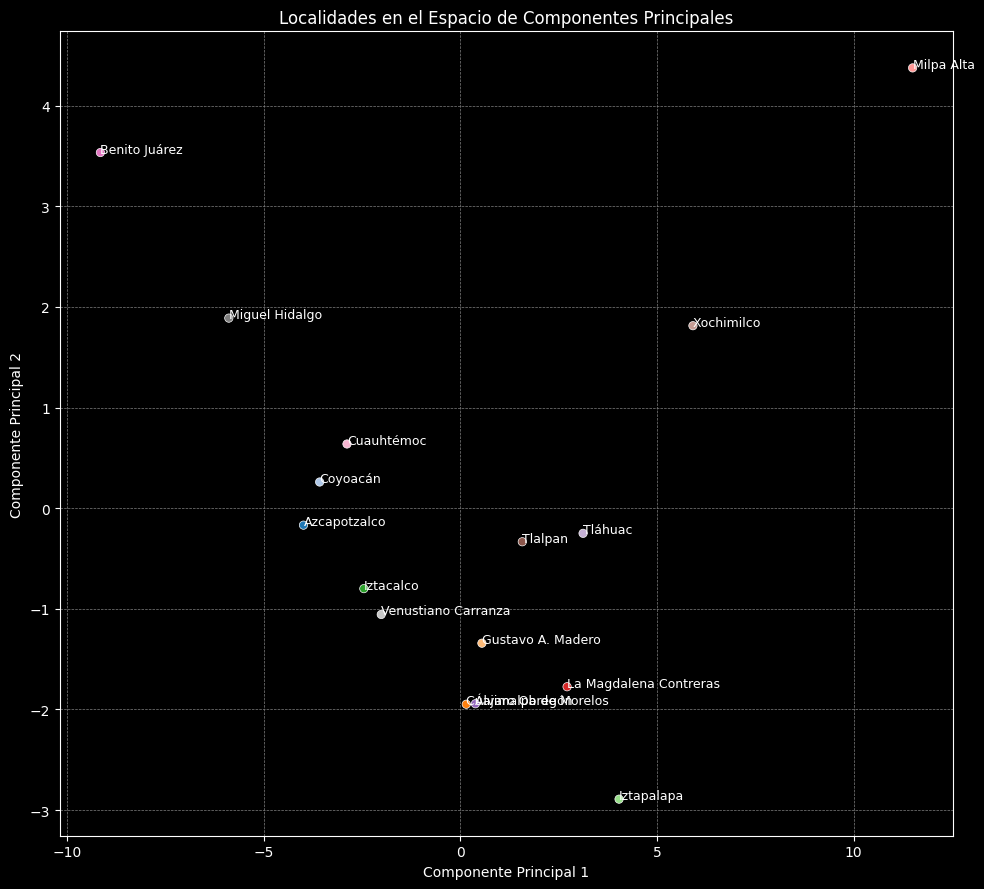

In [266]:
plt.style.use('dark_background')

plt.figure(figsize=(10,9))
sns.scatterplot(data = df_two_axis, x = 'PC1', y = 'PC2', hue = 'NOM_MUN', palette = 'tab20', legend = False )
for i in range(df_two_axis.shape[0]):
    plt.text(df_two_axis['PC1'].iloc[i], df_two_axis['PC2'].iloc[i], df_two_axis['NOM_MUN'].iloc[i], fontsize = 9,color='white')

plt.title('Localidades en el Espacio de Componentes Principales',color = 'white')
plt.xlabel('Componente Principal 1',color = 'white')
plt.ylabel('Componente Principal 2',color = 'white')
ax = plt.gca()
ax.tick_params(colors='white')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [267]:
pca_model = pipe.named_steps['pca']
pca_components = pd.DataFrame(
    pca_model.components_,
    columns=df_pca.drop(columns = ['Indice_marginalidad']).columns,   
    index=[f'PC{i+1}' for i in range(pca_model.n_components_)]
).T

In [268]:
pca_components

,PC1,PC2
Tasa_VPH_PISOTI,0.180582,0.165391
Tasa_VPH_S_ELEC,0.176164,0.229486
Tasa_VPH_AGUAFV,0.161947,0.282960
Tasa_VPH_NODREN,0.166423,0.277876
Tasa_VPH_NDEAED,0.163375,0.303676
Tasa_VPH_LETR,0.166335,0.282265
Tasa_VPH_1DOR,0.133463,0.105458
Tasa_VPH_1CUART,0.201248,0.023470
Tasa_VPH_SINLTC,0.198364,0.041793
Tasa_VPH_SINCINT,0.203247,0.015744


In [269]:
print((pca_components['PC1']).sort_values(ascending=False))

Tasa_P15YM_AN       0.205022
Tasa_P15YM_AN_M     0.204699
Tasa_P15YM_AN_F     0.203605
Tasa_VPH_SINCINT    0.203247
Tasa_VPH_1CUART     0.201248
Tasa_VPH_SINLTC     0.198364
Tasa_P15PRI_INM     0.197991
Tasa_VPH_SINTIC     0.197075
Tasa_VPH_SNBIEN     0.196593
Tasa_P15YM_SE_F     0.190079
Tasa_P15PRI_IN      0.189517
Tasa_P15YM_SE       0.185296
Tasa_P15SEC_INM     0.184559
Tasa_VPH_PISOTI     0.180582
Tasa_P15SEC_IN      0.179097
Tasa_P15PRI_INF     0.178547
Tasa_P12A14NOAM     0.177571
Tasa_VPH_S_ELEC     0.176164
Tasa_P5_HLI_NHE     0.175525
Tasa_P12A14NOAF     0.175147
Tasa_P5_HLI_HE      0.168723
Tasa_P15YM_SE_M     0.166823
Tasa_VPH_NODREN     0.166423
Tasa_VPH_LETR       0.166335
Tasa_P15SEC_INF     0.166080
Tasa_VPH_NDEAED     0.163375
Tasa_VPH_AGUAFV     0.161947
Tasa_PSINDER        0.158449
Tasa_VPH_SINRTV     0.157172
Tasa_VPH_1DOR       0.133463
Tasa_POB_AFRO      -0.126178
Name: PC1, dtype: float64


In [270]:
print((pca_components['PC2']).sort_values(ascending=False))

Tasa_VPH_NDEAED     0.303676
Tasa_VPH_AGUAFV     0.282960
Tasa_VPH_LETR       0.282265
Tasa_VPH_NODREN     0.277876
Tasa_P5_HLI_HE      0.240049
Tasa_VPH_S_ELEC     0.229486
Tasa_VPH_SINRTV     0.191259
Tasa_VPH_PISOTI     0.165391
Tasa_POB_AFRO       0.156239
Tasa_VPH_SNBIEN     0.148409
Tasa_VPH_SINTIC     0.114422
Tasa_VPH_1DOR       0.105458
Tasa_P5_HLI_NHE     0.079994
Tasa_VPH_SINLTC     0.041793
Tasa_VPH_1CUART     0.023470
Tasa_VPH_SINCINT    0.015744
Tasa_P15YM_AN_M     0.012119
Tasa_P15YM_AN      -0.034993
Tasa_P15YM_AN_F    -0.063431
Tasa_PSINDER       -0.102631
Tasa_P12A14NOAF    -0.119589
Tasa_P15PRI_INM    -0.146197
Tasa_P15YM_SE_F    -0.165532
Tasa_P15YM_SE_M    -0.170163
Tasa_P15YM_SE      -0.174064
Tasa_P12A14NOAM    -0.179484
Tasa_P15SEC_INM    -0.200034
Tasa_P15PRI_IN     -0.203795
Tasa_P15SEC_IN     -0.215423
Tasa_P15SEC_INF    -0.233199
Tasa_P15PRI_INF    -0.253383
Name: PC2, dtype: float64


In [271]:
gdf = gpd.read_file('poligonos_alcaldias_cdmx.shp')
df_mer = dfi[['NOM_MUN','Indice_marginalidad']].copy()
gdf_mer = gdf.merge(df_mer,left_on = 'NOMGEO', right_on = 'NOM_MUN')

In [272]:
gdf_mer.sort_values(by = 'Indice_marginalidad')

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,NOM_MUN,Indice_marginalidad
12,09014,09,014,Benito Juárez,"POLYGON ((-99.14762 19.40401, -99.14681 19.403...",Benito Juárez,0.000000
14,09016,09,016,Miguel Hidalgo,"POLYGON ((-99.19045 19.47044, -99.19058 19.467...",Miguel Hidalgo,0.158119
0,09002,09,002,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",Azcapotzalco,0.250041
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",Coyoacán,0.269950
13,09015,09,015,Cuauhtémoc,"POLYGON ((-99.12951 19.46265, -99.12919 19.462...",Cuauhtémoc,0.303595
4,09006,09,006,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",Iztacalco,0.324357
15,09017,09,017,Venustiano Carranza,"POLYGON ((-99.10946 19.45292, -99.10895 19.452...",Venustiano Carranza,0.345786
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",Cuajimalpa de Morelos,0.450466
8,09010,09,010,Álvaro Obregón,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",Álvaro Obregón,0.461730
3,09005,09,005,Gustavo A. Madero,"POLYGON ((-99.11124 19.5615, -99.11485 19.5576...",Gustavo A. Madero,0.469711


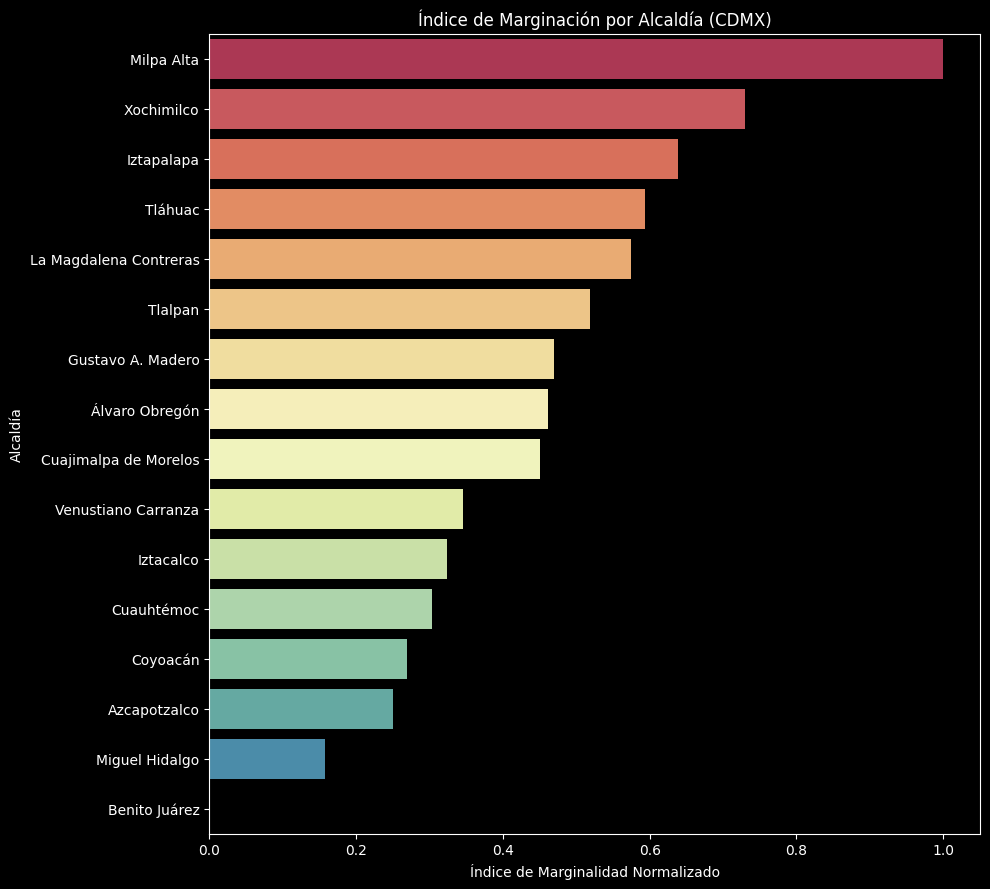

In [273]:
plt.figure(figsize = (10,9))
sns.barplot(data = dfi.sort_values(by = 'Indice_marginalidad', ascending= False), 
            x = 'Indice_marginalidad', 
            y = 'NOM_MUN',
            hue = 'NOM_MUN',
            palette = 'Spectral'
           )

plt.title('Índice de Marginación por Alcaldía (CDMX)')
plt.xlabel('Índice de Marginalidad Estandarizado')
plt.ylabel('Alcaldía')
plt.tight_layout()
plt.show()



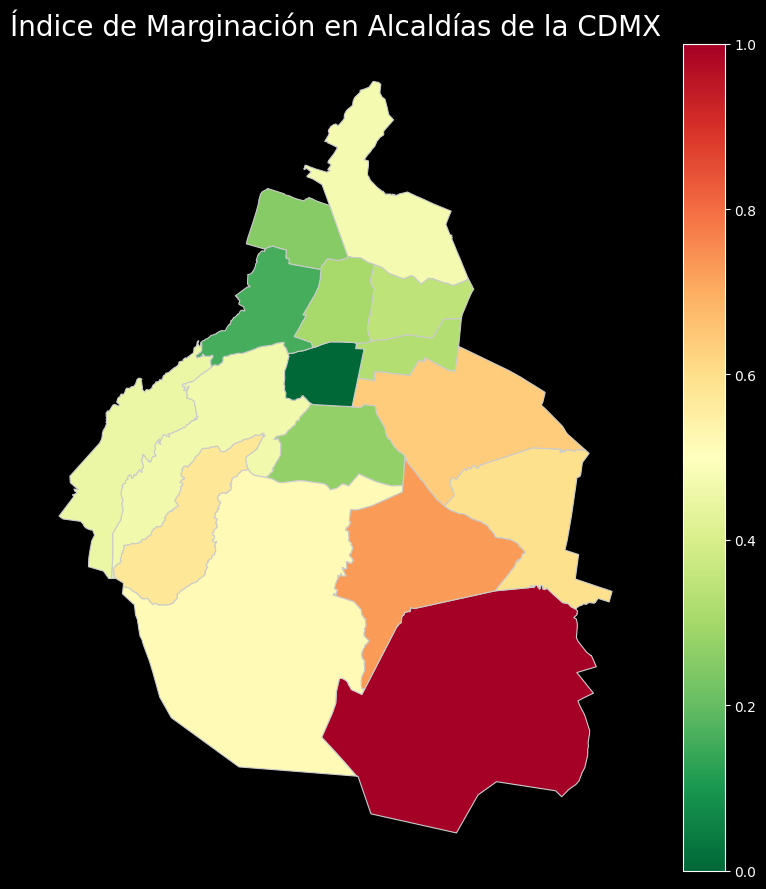

In [274]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
gdf_mer.plot(column='Indice_marginalidad',
                cmap='RdYlGn_r',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                norm  = colors.PowerNorm(gamma = 1)
                )
#RdBu_r
#RdYlGn_r
ax.set_title("Índice de Marginación en Alcaldías de la CDMX", fontsize=20)
ax.axis('off')
plt.tight_layout()
plt.show()

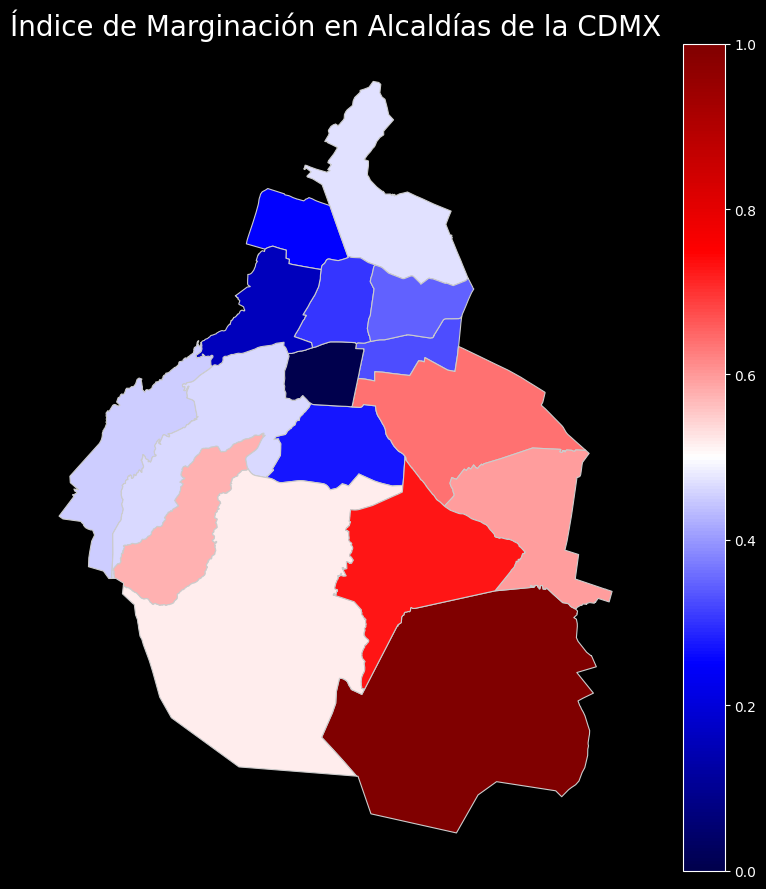

In [275]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
gdf_mer.plot(column='Indice_marginalidad',
                cmap='seismic',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True,
                norm  = colors.PowerNorm(gamma = 1)
                )
#RdBu_r
#RdYlGn_r
ax.set_title("Índice de Marginación en Alcaldías de la CDMX", fontsize=20)
ax.axis('off')
plt.tight_layout()
plt.show()

In [279]:
dfi = dfi.sort_values(by = 'Indice_marginalidad', ascending=False)

In [280]:
dfi

,NOM_MUN,Indice_marginalidad
7,Milpa Alta,1.000000
11,Xochimilco,0.729525
5,Iztapalapa,0.638577
9,Tláhuac,0.594265
6,La Magdalena Contreras,0.574586
10,Tlalpan,0.519438
3,Gustavo A. Madero,0.469711
8,Álvaro Obregón,0.461730
2,Cuajimalpa de Morelos,0.450466
15,Venustiano Carranza,0.345786


In [281]:
dfi.to_csv('Indice de marginalidad CDMX Estandarizado.csv', index  = False)

In [283]:
joblib.dump(pipe, 'Pipeline.pkl')
joblib.dump(mMs, 'mMs.pkl')

['mMs.pkl']